In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Step 2: Load Dataset
data = pd.read_csv("data/depression_sampling - Sheet1.csv")

# Top 5 rows check
data.head()


,angry,fear,disgust,happy,nutral,sad,surprise,depression
0,2,5,7,6,6,4,1,Moderate
1,10,2,2,9,9,10,9,Low
2,7,6,2,5,8,5,8,Moderate
3,5,3,3,4,5,6,8,Moderate
4,6,4,10,6,7,6,8,Moderate


In [4]:
# Step 3: Data Cleaning

# Missing values check karna
print("Missing values per column:")
print(data.isnull().sum())

# Dataset ke info dekhna
print("\nDataset Info:")
print(data.info())

# Agar koi missing values hain to unko drop ya fill karna (example: drop)
data = data.dropna()

print("\nShape after cleaning:", data.shape)


Missing values per column:
angry         0
fear          0
disgust       0
happy         0
nutral        0
sad           0
surprise      0
depression    0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   angry       499 non-null    int64 
 1   fear        499 non-null    int64 
 2   disgust     499 non-null    int64 
 3   happy       499 non-null    int64 
 4   nutral      499 non-null    int64 
 5   sad         499 non-null    int64 
 6   surprise    499 non-null    int64 
 7   depression  499 non-null    object
dtypes: int64(7), object(1)
memory usage: 31.3+ KB
None

Shape after cleaning: (499, 8)


            angry        fear     disgust       happy      nutral         sad  \
count  499.000000  499.000000  499.000000  499.000000  499.000000  499.000000   
mean     5.490982    5.338677    5.490982    5.316633    5.392786    5.655311   
std      2.792959    2.786861    2.854824    2.817748    2.792350    2.885608   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      3.000000    3.000000    3.000000    3.000000    3.000000    3.000000   
50%      5.000000    5.000000    6.000000    5.000000    5.000000    6.000000   
75%      8.000000    8.000000    8.000000    7.000000    8.000000    8.000000   
max     10.000000   10.000000   10.000000   10.000000   10.000000   10.000000   

         surprise  
count  499.000000  
mean     5.348697  
std      2.740199  
min      1.000000  
25%      3.000000  
50%      5.000000  
75%      8.000000  
max     10.000000  


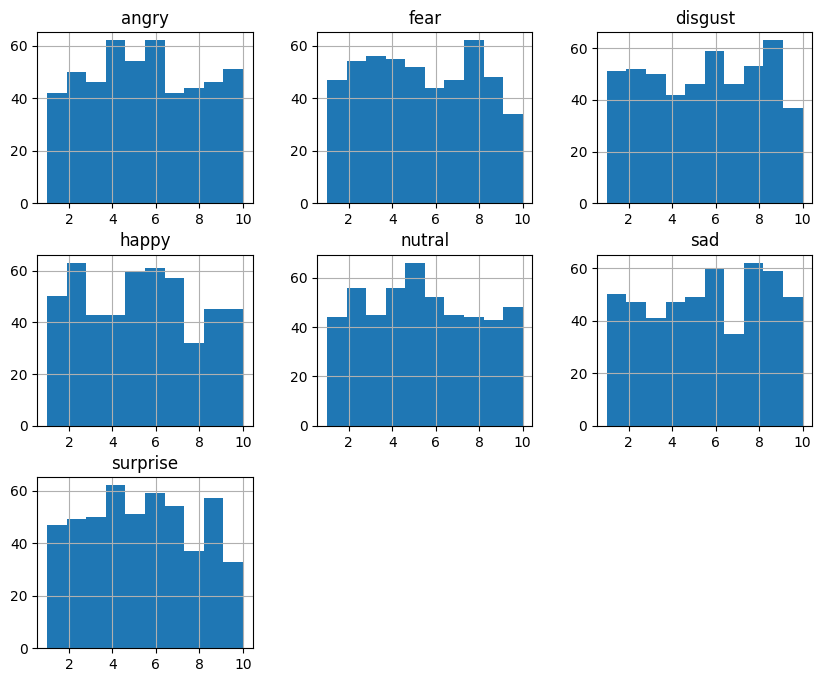

In [5]:
# Step 4: Descriptive Statistics
print(data.describe())

# Histogram plot karna for each numeric column
data.hist(figsize=(10, 8))
plt.show()


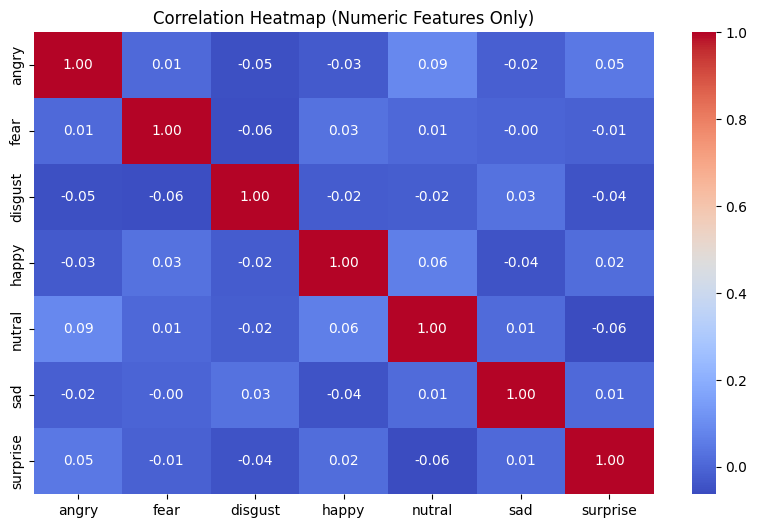

In [8]:
# Sirf numeric columns ke liye correlation
plt.figure(figsize=(10,6))
sns.heatmap(data.select_dtypes(include="number").corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [10]:
print(data.columns)


Index(['angry', 'fear', 'disgust', 'happy', 'nutral', 'sad', 'surprise',
       'depression'],
      dtype='object')


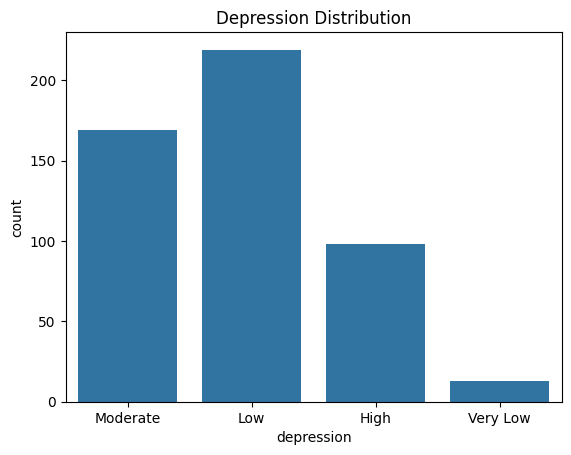

In [11]:
sns.countplot(x="depression", data=data)
plt.title("Depression Distribution")
plt.show()


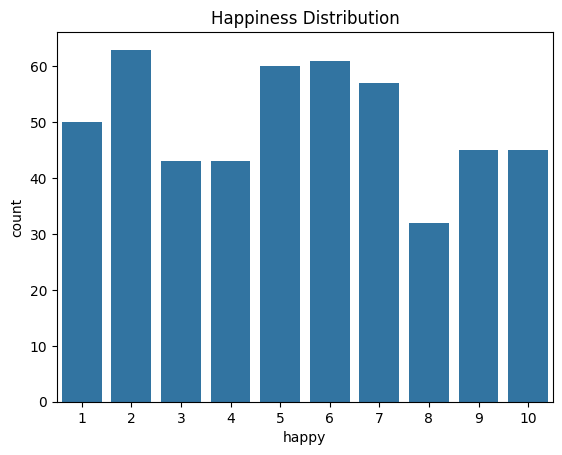

In [12]:
sns.countplot(x="happy", data=data)
plt.title("Happiness Distribution")
plt.show()


In [13]:
# Features (X) = emotions
X = data.drop("depression", axis=1)

# Target (y) = depression
y = data["depression"]


In [15]:
# 1. Features & Target
X = data.drop("depression", axis=1)
y = data["depression"]

# 2. Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Training
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)  # max_iter added to avoid warnings
model.fit(X_train, y_train)

# 4. Prediction
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)

# 5. Results
print("✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


✅ Model Accuracy: 0.78

📊 Classification Report:
               precision    recall  f1-score   support

        High       0.94      0.75      0.83        20
         Low       0.77      0.85      0.80        39
    Moderate       0.72      0.72      0.72        39
    Very Low       1.00      1.00      1.00         2

    accuracy                           0.78       100
   macro avg       0.86      0.83      0.84       100
weighted avg       0.79      0.78      0.78       100



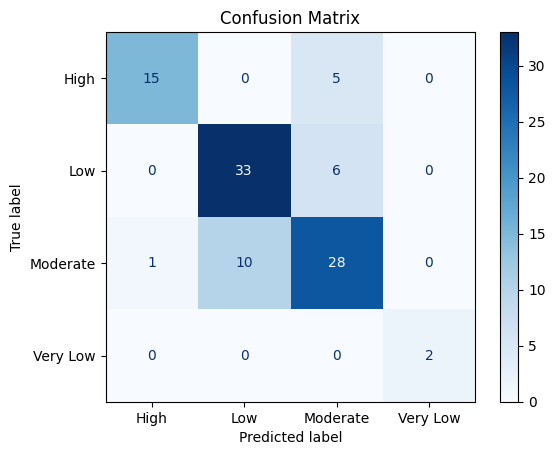

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [17]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))


Decision Tree Accuracy: 0.9
